In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm.auto import tqdm

import torch
import torch.nn as nn
import torchvision

import sys

sys.path.append('/home/nikita/e2e-driving')

from dataloading.nvidia import NvidiaTrainDataset

%load_ext autoreload
%autoreload 2

In [5]:
root_path = Path("/data/Bolt/end-to-end/rally-estonia-cropped")

trainset = NvidiaTrainDataset(root_path)
len(trainset)

[NvidiaDataset] Using default transform: Compose(
)
/data/Bolt/end-to-end/rally-estonia-cropped/2021-05-20-12-36-10_e2e_sulaoja_20_30: length=12025, filtered=1
/data/Bolt/end-to-end/rally-estonia-cropped/2021-05-20-12-43-17_e2e_sulaoja_20_30: length=6809, filtered=0
/data/Bolt/end-to-end/rally-estonia-cropped/2021-05-20-12-51-29_e2e_sulaoja_20_30: length=5393, filtered=0
/data/Bolt/end-to-end/rally-estonia-cropped/2021-05-20-13-44-06_e2e_sulaoja_10_10: length=3833, filtered=1
/data/Bolt/end-to-end/rally-estonia-cropped/2021-05-20-13-51-21_e2e_sulaoja_10_10: length=3798, filtered=1
/data/Bolt/end-to-end/rally-estonia-cropped/2021-05-20-13-59-00_e2e_sulaoja_10_10: length=687, filtered=1
/data/Bolt/end-to-end/rally-estonia-cropped/2021-05-28-15-07-56_e2e_sulaoja_20_30: length=15626, filtered=0
/data/Bolt/end-to-end/rally-estonia-cropped/2021-05-28-15-17-19_e2e_sulaoja_20_30: length=3218, filtered=0
/data/Bolt/end-to-end/rally-estonia-cropped/2021-06-09-13-14-51_e2e_rec_ss2: length=49918, 

660503

In [6]:
df = trainset.frames
print(len(df))

1321006


In [7]:
angles = np.rad2deg(trainset.frames.steering_angle.values)
angles.shape

(1321006,)

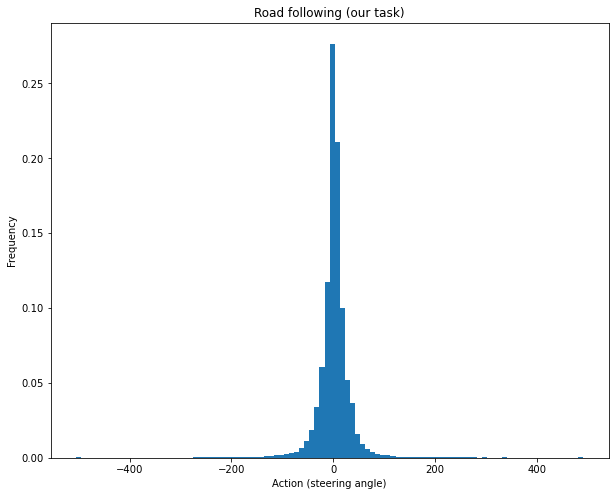

In [11]:
plt.figure(figsize=(10, 8))

plt.title('Road following (our task)')
plt.xlabel('Action (steering angle)')
plt.ylabel('Frequency')
plt.hist(angles, bins=100, weights= np.ones(len(angles)) / len(angles))
plt.show()

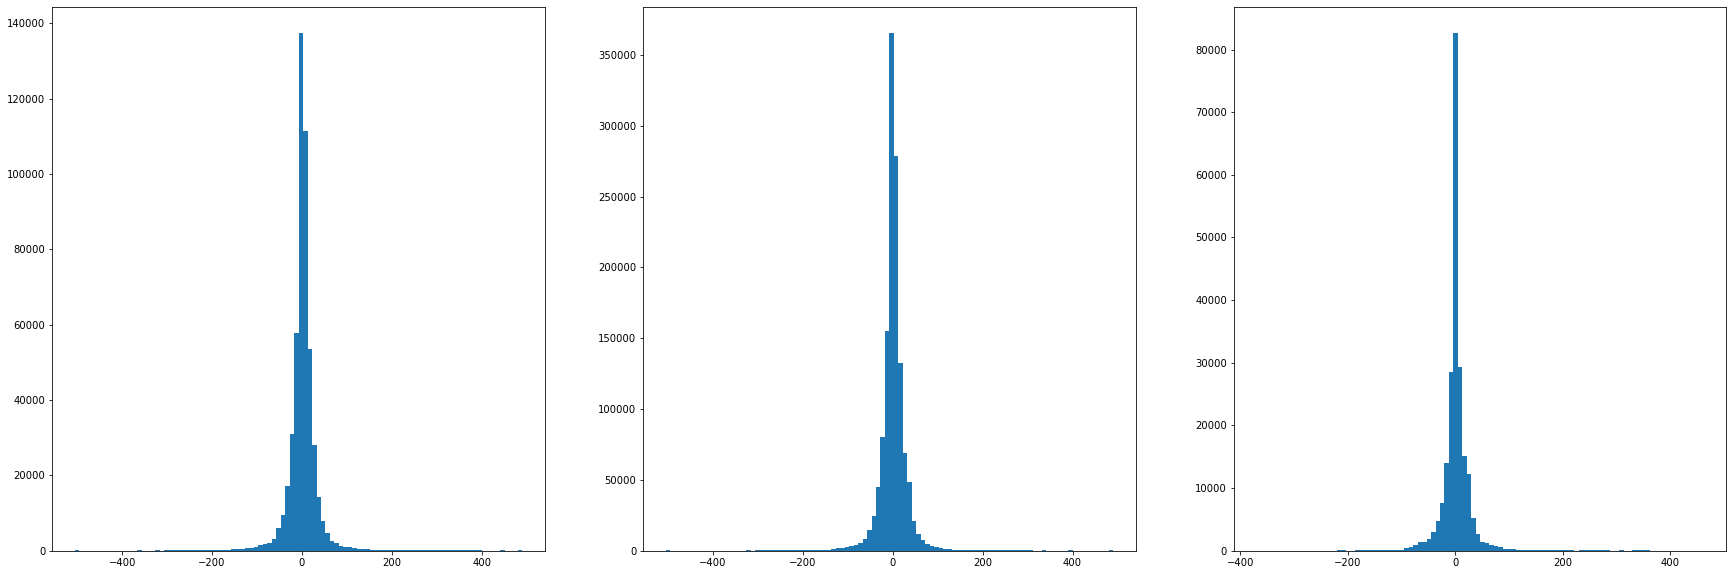

In [46]:

train_spring = trainset_spring.frames.steering_angle / np.pi * 180
train_autumn = trainset_autumn.frames.steering_angle / np.pi * 180
valid_steering = validset.frames.steering_angle / np.pi * 180

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30,10))
ax1.hist(train_spring, bins=100)
ax2.hist(train_autumn, bins=100)
ax3.hist(valid_steering, bins=100);

In [ ]:
vahi1 = PilotNet()
vahi1.load_state_dict(torch.load(f"models/20211019015910_spring-v1/best.pt"))
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vahi1 = vahi1.to(device);

In [ ]:
trainer = Trainer()
metrics = trainer.calculate_open_loop_metrics(vahi1, validloader, 30)
metrics

In [ ]:
vahi2 = PilotNet()
vahi2.load_state_dict(torch.load(f"models/20211019152624_autumn-v1/best.pt"))
vahi2 = vahi2.to(device);

In [ ]:
metrics = trainer.calculate_open_loop_metrics(vahi2, validloader, 30)
metrics

In [ ]:
wide2 = PilotNet()
wide2.load_state_dict(torch.load(f"models/20211019114940_spring-v2/best.pt"))
wide2 = wide2.to(device)
metrics = trainer.calculate_open_loop_metrics(wide2, validloader, 30)
metrics

In [ ]:
def calculate_errors(model, dataloader, trainer):
    predictions = trainer.predict(model, dataloader)
    predicted_degrees = np.array(predictions) / np.pi * 180
    true_degrees = dataloader.dataset.frames.steering_angle.to_numpy() / np.pi * 180
    errors = true_degrees - predicted_degrees
    return errors, predicted_degrees, true_degrees

In [ ]:
errors, predicted_degrees, true_degrees = calculate_errors(wide2, validloader, trainer)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 20))
ax1.hist(errors, bins=200)
ax1.set_xlim([-400, 400])
ax1.set_title("Errors")
ax2.hist(predicted_degrees, bins=200)
ax2.set_xlim([-400, 400])
ax2.set_title("Predicted degrees")
ax3.hist(true_degrees, bins=200)
ax3.set_xlim([-400, 400])
ax3.set_title("True degrees");

In [ ]:
errors, predicted_degrees, true_degrees = calculate_errors(vahi2, validloader, trainer)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 20))
ax1.hist(errors, bins=200)
ax1.set_xlim([-400, 400])
ax1.set_title("Errors")
ax2.hist(predicted_degrees, bins=200)
ax2.set_xlim([-400, 400])
ax2.set_title("Predicted degrees")
ax3.hist(true_degrees, bins=200)
ax3.set_xlim([-400, 400])
ax3.set_title("True degrees");

In [ ]:
errors, predicted_degrees, true_degrees = calculate_errors(vahi1, validloader, trainer)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 20))
ax1.hist(errors, bins=200)
ax1.set_xlim([-400, 400])
ax1.set_title("Errors")
ax2.hist(predicted_degrees, bins=200)
ax2.set_xlim([-400, 400])
ax2.set_title("Predicted degrees")
ax3.hist(true_degrees, bins=200)
ax3.set_xlim([-400, 400])
ax3.set_title("True degrees");